## Xマッチのブキ使用率を求める

In [22]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from packages.japanize import japanize
import packages.db as db
import packages.i18n as i18n
import packages.image as image
import packages.definitions as d
import packages.utils as u
import packages.visualize as v

locale = i18n.Locale.JA
lobby = d.Lobby.XMATCH
date_from = dt.date(2023, 5, 1)
date_to = dt.date(2023, 5, 10)
battles = db.load_battles(lobby=lobby, date_from=date_from, date_to=date_to)

バトル数: 11072


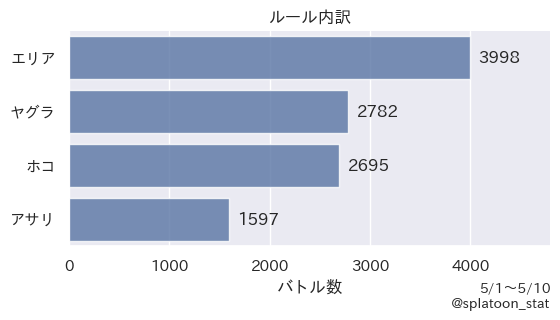

パワー不明バトル数: 447


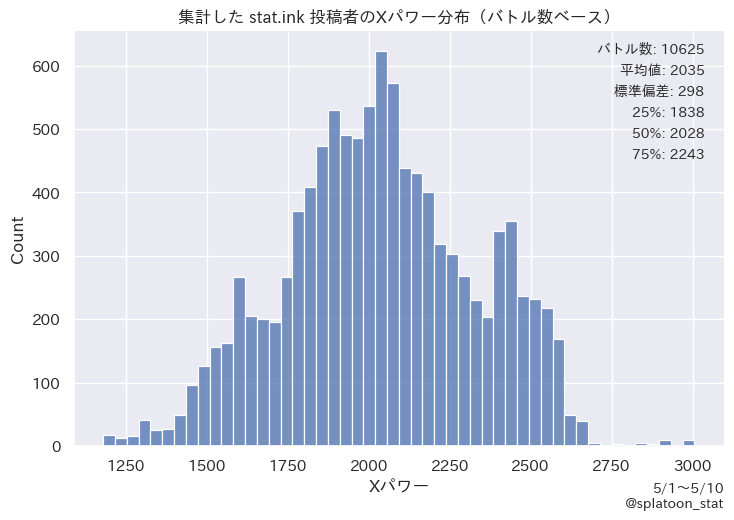

In [23]:
v.xmatch_mode_breakdown(battles=battles, locale=locale)
v.xmatch_power_distribution(battles=battles, locale=locale)

In [24]:
players = u.to_players(battles)

### ブキ使用率

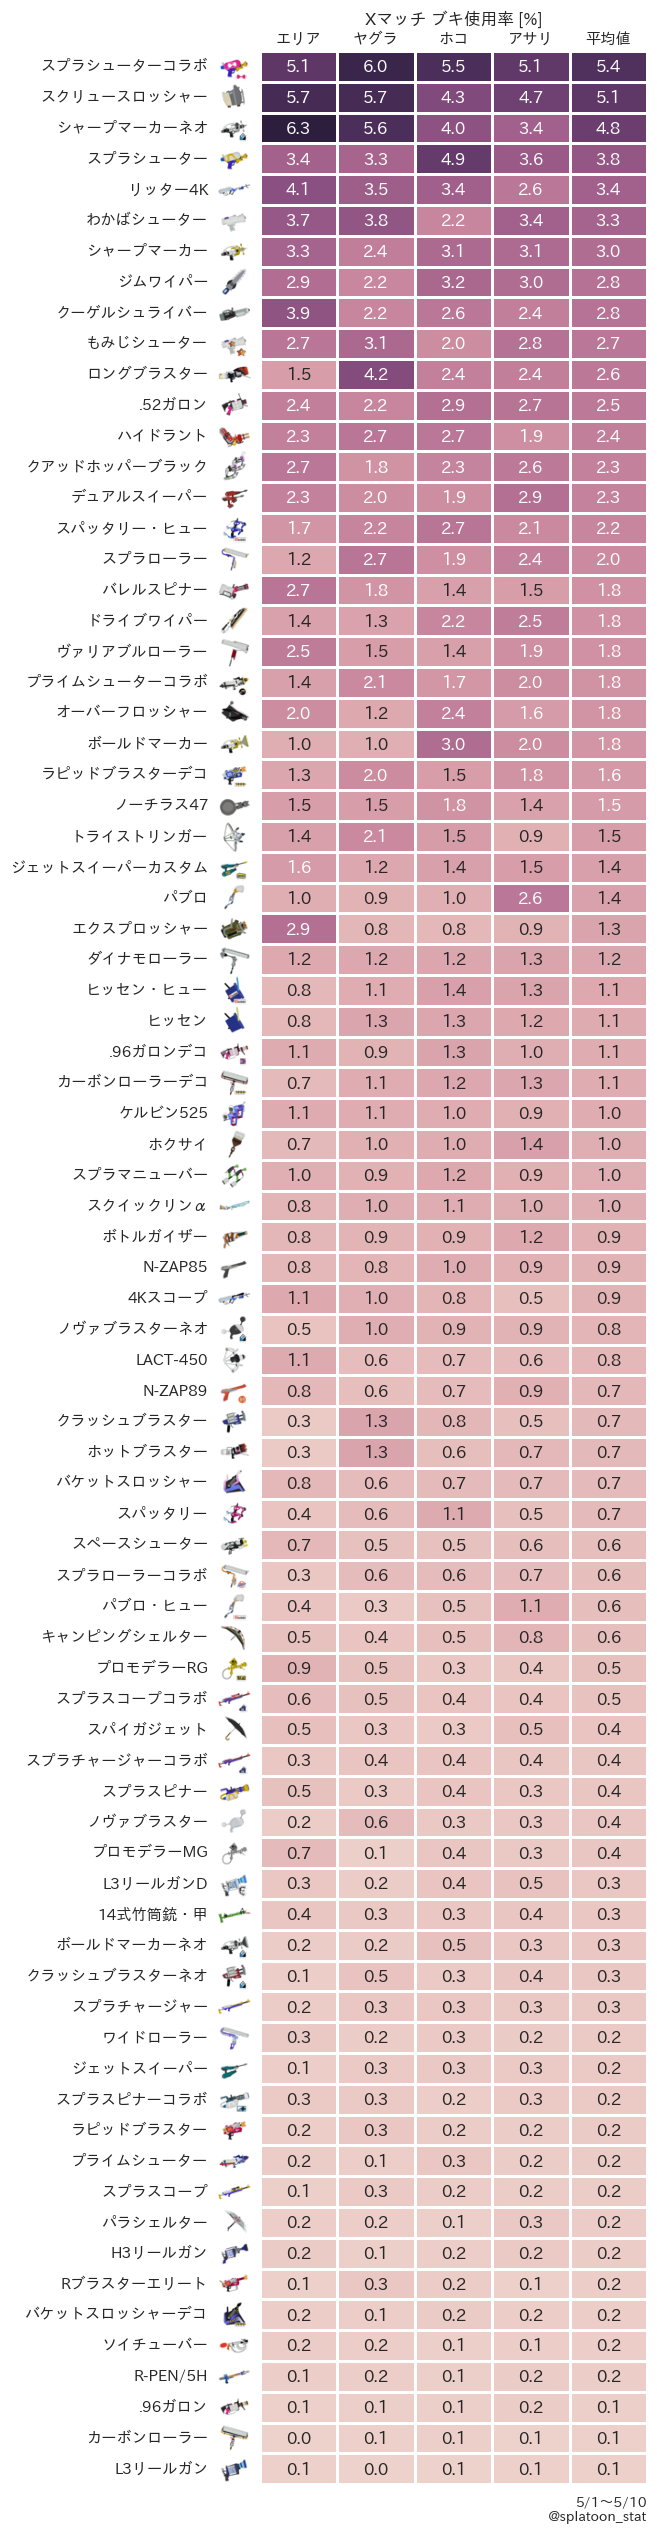

In [25]:
usage = players.groupby("mode")["weapon"].value_counts(normalize=True).to_frame(name="usage")
usage_map = usage.reset_index().pivot(index="weapon", columns="mode", values="usage").reindex(d.MODE_ORDER, axis=1)
usage_map["mean"] = usage_map.mean(axis=1)
usage_map = usage_map.sort_values("mean", ascending=False)

sns.set_theme()
japanize()

translations = i18n.get_translations(locale=locale)
match locale:
    case i18n.Locale.JA: title = f"{translations[lobby.value]} ブキ使用率 [%]"
    case i18n.Locale.EN: title = f"Weapon usage in {translations[lobby.value]} [%]"

fig, ax = plt.subplots(figsize=(5, len(usage_map.index) * 0.4))
sns.heatmap(
    data=usage_map.mul(100),
    annot=True,
    fmt=".1f",
    cbar=False,
    cmap=sns.cubehelix_palette(gamma=1.0, as_cmap=True),
    linewidths=2,
    ax=ax,
)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.tick_params(length=0)

xkeys, ykeys = u.get_ax_ticklabels(ax)
xticklabels = [translations[x] for x in xkeys]
yticklabels = [translations[x] for x in ykeys]

ax.set(
    title=title,
    xlabel="",
    ylabel="",
    xticklabels=xticklabels,
)
ax.yaxis.set_ticklabels(yticklabels, x=-0.12)

for i, key in enumerate(ykeys):
    image_path = image.get_image_path(key)
    img = OffsetImage(plt.imread(image_path), zoom=.65)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0, 0), xybox=(-0.33, i + 0.5), frameon=False)
    ax.add_artist(ab)

u.credit(ax, fig, i18n.data_to_duration_str(battles, locale), 0.3)

plt.show()

### サブウェポン使用率

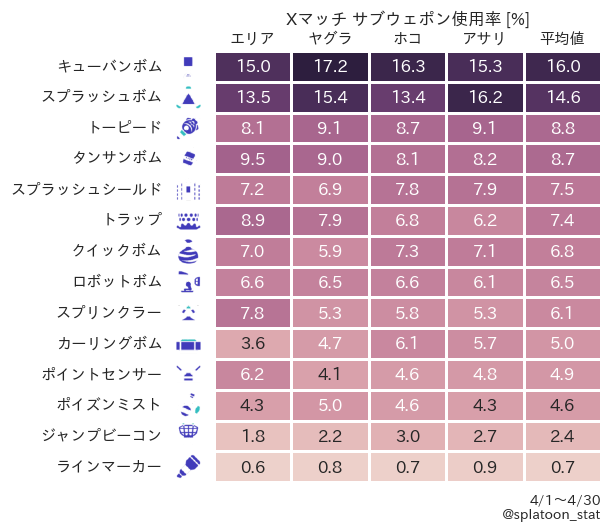

In [12]:
usage = players.groupby("mode")["sub-weapon"].value_counts(normalize=True).to_frame(name="usage")
usage_map = usage.reset_index().pivot(index="sub-weapon", columns="mode", values="usage").reindex(d.MODE_ORDER, axis=1)
usage_map["mean"] = usage_map.mean(axis=1)
usage_map = usage_map.sort_values("mean", ascending=False)

sns.set_theme()
japanize()

translations = i18n.get_translations(locale=locale)
match locale:
    case i18n.Locale.JA: title = f"{translations[lobby.value]} サブウェポン使用率 [%]"
    case i18n.Locale.EN: title = f"Sub weapon usage in {translations[lobby.value]} [%]"

fig, ax = plt.subplots(figsize=(5, len(usage_map.index) * 0.4))
sns.heatmap(
    data=usage_map.mul(100),
    annot=True,
    fmt=".1f",
    cbar=False,
    cmap=sns.cubehelix_palette(gamma=1.0, as_cmap=True),
    linewidths=2,
    ax=ax,
)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.tick_params(length=0)

xkeys, ykeys = u.get_ax_ticklabels(ax)
xticklabels = [translations[x] for x in xkeys]
yticklabels = [translations[x] for x in ykeys]

ax.set(
    title=title,
    xlabel="",
    ylabel="",
    xticklabels=xticklabels,
)
ax.yaxis.set_ticklabels(yticklabels, x=-0.12)

for i, key in enumerate(ykeys):
    image_path = image.get_image_path(key)
    img = OffsetImage(plt.imread(image_path), zoom=.5)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0, 0), xybox=(-0.33, i + 0.5), frameon=False)
    ax.add_artist(ab)

u.credit(ax, fig, i18n.data_to_duration_str(battles, locale), 0.3)

plt.show()

### スペシャルウェポン使用率

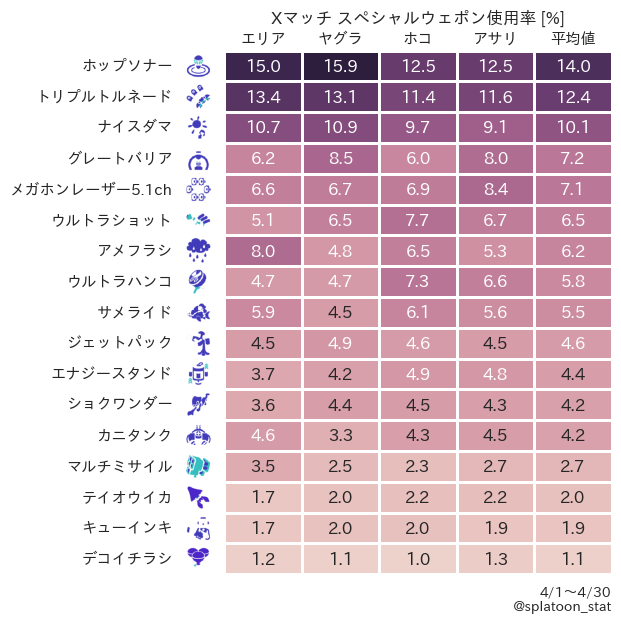

In [13]:
usage = players.groupby("mode")["special-weapon"].value_counts(normalize=True).to_frame(name="usage")
usage_map = usage.reset_index().pivot(index="special-weapon", columns="mode", values="usage").reindex(d.MODE_ORDER, axis=1)
usage_map["mean"] = usage_map.mean(axis=1)
usage_map = usage_map.sort_values("mean", ascending=False)

sns.set_theme()
japanize()

translations = i18n.get_translations(locale=locale)
match locale:
    case i18n.Locale.JA: title = f"{translations[lobby.value]} スペシャルウェポン使用率 [%]"
    case i18n.Locale.EN: title = f"Special weapon usage in {translations[lobby.value]} [%]"

fig, ax = plt.subplots(figsize=(5, len(usage_map.index) * 0.4))
sns.heatmap(
    data=usage_map.mul(100),
    annot=True,
    fmt=".1f",
    cbar=False,
    cmap=sns.cubehelix_palette(gamma=1.0, as_cmap=True),
    linewidths=2,
    ax=ax,
)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.tick_params(length=0)

xkeys, ykeys = u.get_ax_ticklabels(ax)
xticklabels = [translations[x] for x in xkeys]
yticklabels = [translations[x] for x in ykeys]

ax.set(
    title=title,
    xlabel="",
    ylabel="",
    xticklabels=xticklabels,
)
ax.yaxis.set_ticklabels(yticklabels, x=-0.12)

for i, key in enumerate(ykeys):
    image_path = image.get_image_path(key)
    img = OffsetImage(plt.imread(image_path), zoom=.5)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0, 0), xybox=(-0.33, i + 0.5), frameon=False)
    ax.add_artist(ab)

u.credit(ax, fig, i18n.data_to_duration_str(battles, locale), 0.3)

plt.show()